In [207]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [208]:
%autoreload 2
%matplotlib inline

In [209]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [210]:
from SepMe.processing.batchprocessing import *
batch_files = '../data/mturk_samples/sample_abstract/results/'
processed_files = '../data/mturk_samples/sample_abstract/processed/'
qual_files = '../data/mturk_samples/sample_abstract/qualifications/'
check_file = '../data/orig_data/human_reduced_results.csv'

figs = '../data/mturk_samples/sample_abstract/result_figures/'

green = '#029e73'
pink  = '#cc78bc'
blue = '#56b4e9'


colors = ['#0173b2',
    '#de8f05',
    '#029e73',
    '#d55e00',
    '#fbafe4',
    '#949494',
    '#ece133',
    '#56b4e9',
    '#cc78bc',
    '#ca9161']

In [222]:
payment = 0.12
dfs = []

cols = []
for file in os.listdir(batch_files):
    
    if file.startswith('proc') or file.startswith('.'):
        continue
    
    
    df = append_test_data(batch_files  + file, check_file)
    df['Reward'] = np.round(df['Reward'].str.lstrip('$').astype('float64'),2)
    time = np.floor(np.mean(df['WorkTimeInSeconds']))
    reward = np.round(np.mean(df['Reward']),2)
    df['ShouldReward'] = payment*(time/60)
    
    if file.startswith('training'):
        df['phase'] = 'training'
        #print('Training')
        df['ShouldReward'] = df['Reward']

    else:
        df['phase'] = 'task'
        #print('Task')
       
    df['type'] = 'abstract'
    if 'semantic' in file:
        df['type'] = 'semantic'
        
    df['1v1'] = False
    if '1v1' in file:
        df['1v1'] = True

    cols.append(set(list(df.columns)))
    if file.startswith('task'):
        print(file)
        print(df.shape)
        print('Expiration date: {}'.format(df.loc[0,'Expiration']))
        print('Workers: {}'.format(len(set(df['WorkerId']))))
        print('{} seconds - {} reward - {} should'.format(np.round(np.mean(df['WorkTimeInSeconds']), 2), 
                                            np.round(np.mean(df['Reward']),2),
                                            np.round(np.mean(df['ShouldReward']),2)             ))
        print('') 
    else: 
        pass
    
#     f, axes = plt.subplots(1, figsize=(5, 5))
#     sns.distplot(df['WorkTimeInSeconds'])

    dfs.append(df)
    
    

df = pd.concat(dfs, axis=0, sort=True)
df_agg = aggregate_batch(df)

df.to_csv(processed_files + 'batches_combined.csv', index=False)

print(df.columns)
print(np.sum(df['ShouldReward']- df['Reward']))
df




task_abstract_Batch_3848359_batch_results.csv
(240, 31)
Expiration date: Mon Dec 02 10:03:21 PST 2019
Workers: 53
62.84 seconds - 0.1 reward - 0.12 should

task_semantic_1v1_Batch_3868234_batch_results.csv
(7396, 31)
Expiration date: Fri Dec 20 07:33:31 PST 2019
Workers: 53
29.45 seconds - 0.02 reward - 0.06 should

task_abstract_Batch_3863742_batch_results.csv
(720, 31)
Expiration date: Thu Dec 19 09:43:10 PST 2019
Workers: 20
47.55 seconds - 0.06 reward - 0.09 should

task_abstract_1v1_Batch_3867424_batch_results.csv
(2790, 31)
Expiration date: Fri Dec 13 04:39:40 PST 2019
Workers: 37
17.22 seconds - 0.01 reward - 0.03 should

task_semantic_Batch_3863734_batch_results.csv
(1981, 35)
Expiration date: Mon Dec 16 09:34:30 PST 2019
Workers: 44
47.97 seconds - 0.05 reward - 0.09 should

task_abstract_1v1_Batch_3868237_batch_results.csv
(4500, 31)
Expiration date: Mon Dec 23 07:38:32 PST 2019
Workers: 47
14.91 seconds - 0.02 reward - 0.03 should

task_abstract_Batch_3864520_batch_results.c

,1v1,Approve,AssignmentId,Expiration,HITId,HITTypeId,HITname,Input.file_name,Input.i,Input.image_url,...,phase,sep1,sep2,sep3,sep4,sep5,sep6,sep7,sep8,type
0,False,NaN,34QN5IT0T0W4HZEORUWGG4MT82780A,Mon Dec 02 10:03:21 PST 2019,3X0EMNLXEPU2T8HRQ5HFYZBMCGAPVC,3EYXOXDEN7L769RMQI6E7PVYYOBJZG,JavierGeneratedData_3dinterleaved_3classes_Gli...,NaN,3,https://scatterplots.s3.eu-central-1.amazonaws...,...,task,73.0,76.0,76.0,NaN,NaN,NaN,NaN,NaN,abstract
1,False,NaN,3FQ5JJ512MTRXW8W1PVHHLRXBVCKNG,Mon Dec 02 10:03:21 PST 2019,3X0EMNLXEPU2T8HRQ5HFYZBMCGAPVC,3EYXOXDEN7L769RMQI6E7PVYYOBJZG,JavierGeneratedData_3dinterleaved_3classes_Gli...,NaN,3,https://scatterplots.s3.eu-central-1.amazonaws...,...,task,83.0,84.0,85.0,NaN,NaN,NaN,NaN,NaN,abstract
2,False,NaN,3IJXV6UZ1YOL6ZA0UTRMDPHUKOCIRR,Mon Dec 02 10:03:21 PST 2019,3X0EMNLXEPU2T8HRQ5HFYZBMCGAPVC,3EYXOXDEN7L769RMQI6E7PVYYOBJZG,JavierGeneratedData_3dinterleaved_3classes_Gli...,NaN,3,https://scatterplots.s3.eu-central-1.amazonaws...,...,task,72.0,69.0,79.0,NaN,NaN,NaN,NaN,NaN,abstract
3,False,NaN,3RU7GD8VPPYPO0XHMDHBCWN2S4QPSY,Mon Dec 02 10:03:21 PST 2019,3X0EMNLXEPU2T8HRQ5HFYZBMCGAPVC,3EYXOXDEN7L769RMQI6E7PVYYOBJZG,JavierGeneratedData_3dinterleaved_3classes_Gli...,NaN,3,https://scatterplots.s3.eu-central-1.amazonaws...,...,task,77.0,80.0,80.0,NaN,NaN,NaN,NaN,NaN,abstract
4,False,NaN,3YT88D1N093KTSFMJ6B287TR6ELK30,Mon Dec 02 10:03:21 PST 2019,3X0EMNLXEPU2T8HRQ5HFYZBMCGAPVC,3EYXOXDEN7L769RMQI6E7PVYYOBJZG,JavierGeneratedData_3dinterleaved_3classes_Gli...,NaN,3,https://scatterplots.s3.eu-central-1.amazonaws...,...,task,83.0,81.0,79.0,NaN,NaN,NaN,NaN,NaN,abstract
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,True,NaN,3VHHR074H4MDEHYR6IQT0OIM4Z47LT,Thu Dec 19 09:12:13 PST 2019,3SCKNODZ0XL0FX4ISS17OWQPS387NK,3VTTFELP3TDL7KIJ6VYJFLCKXIOOZ7,tse300_tSNE,NaN,1,https://scatterplots.s3.eu-central-1.amazonaws...,...,training,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,abstract
604,True,NaN,3WETL7AQWUDHB9UJCJ7W6IA9D7I53Y,Thu Dec 19 09:12:13 PST 2019,3SCKNODZ0XL0FX4ISS17OWQPS387NK,3VTTFELP3TDL7KIJ6VYJFLCKXIOOZ7,tse300_tSNE,NaN,1,https://scatterplots.s3.eu-central-1.amazonaws...,...,training,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,abstract
605,True,NaN,3X4JMASXCNENJXCVU6GQ76CUKRJ0BY,Thu Dec 19 09:12:13 PST 2019,3SCKNODZ0XL0FX4ISS17OWQPS387NK,3VTTFELP3TDL7KIJ6VYJFLCKXIOOZ7,tse300_tSNE,NaN,1,https://scatterplots.s3.eu-central-1.amazonaws...,...,training,NaN,41.0,NaN,NaN,NaN,NaN,NaN,NaN,abstract
606,True,NaN,3YHH42UU5CKZW6Y7LJ5KL98ZWLX0LL,Thu Dec 19 09:12:13 PST 2019,3SCKNODZ0XL0FX4ISS17OWQPS387NK,3VTTFELP3TDL7KIJ6VYJFLCKXIOOZ7,tse300_tSNE,NaN,1,https://scatterplots.s3.eu-central-1.amazonaws...,...,training,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,abstract


In [231]:
cols =[]
dfs = []
workers = []
alr_workers = []
for pp in set(df['phase']):
    print(pp)
    for tt in set(df['type']):
        for vv in set(df['1v1']):
            print('Phase: {}  Task Type: {}  1v1: {}'.format(pp,tt,vv))
            print('--------------------------')
            
            df1 = df.loc[(df['type']==tt) & (df['1v1']==vv) & (df['phase']==pp), :].copy()
            if len(df1)==0:
                print('\n\n')
                continue
            
            if vv == True:
                df1 = self_clean(df1, majority=.55, neg=40, pos=60, min_passes = 4)
                #print(df1['total_recordings'])

            else: 
                df1 = self_clean(df1, majority=.55, neg=40, pos=60, min_passes = 2)

            print(df1.shape)
            print('Expiration date: {}'.format(df1.loc[0,'Expiration']))
            print('Workers: {}'.format(len(set(df1['WorkerId']))))
            
            time = np.floor(np.mean(df1['WorkTimeInSeconds']))
            print('Average Completion time: {} seconds'.format(time))
            reward = np.round(np.mean(df1['Reward']),2)
            if df1['Reward'].isna().sum() >0:
                print('!!!!!!rewards nans {}'.format(df1['Reward'].isna().sum()))
        
        
            
            df1['ShouldReward_2'] = np.round(payment*(time/60),2)
            

                
            should_reward=np.round(np.mean(df1['ShouldReward_2']),2)
            
            print('Reward:${}  Should2:${}'.format(reward, should_reward))
            
            
            print('\n\n')
            
            
#             f, axes = plt.subplots(1, figsize=(10, 5))
#             sns.distplot(df1['WorkTimeInSeconds']).set_title('{}-{}-1v1:{} - avg: {} - rew: {} - should {}'.format(pp,
#                                                                                              tt,
#                                                                                              vv, 
#                                                                                              time, 
#                                                                                              reward, 
#                                                                                              should_reward))
            
            if len( df1.loc[df1['total_recordings']>15,:])>0:
                df1.loc[df1['total_recordings']>15,:].to_csv('{}{}_{}_1v1-{}_size-{}_over15.csv'.format(
                                processed_files, pp, tt, vv, df1.shape[0]), index=False)
            
            
            if len( df1.loc[df1['total_recordings']<=15,:])>0:
                print('HITs under 15: {}'.format(len( df1.loc[df1['total_recordings']<=15,:])))
                df1.loc[df1['total_recordings']<=15,'Approve'] = 'X'
                df1.loc[df1['total_recordings']<=15,:].to_csv('{}{}_{}_1v1-{}_size-{}_under15.csv'.format(
                                    processed_files, pp, tt, vv, df1.shape[0]), index=False)
            
            
            workerId = list(set(df1['WorkerId']))
            qualification = pd.DataFrame({"Worker ID": workerId})
            
            
            if pp == 'training':
                if vv == True:
                    if tt == 'semantic':
                        name = 'completed_training_b'
                    else:
                        name = 'completed_training_a'

                else:
                    if tt == 'semantic':
                        name = 'completed_country'
                    else:
                        name = 'completed_first_scatterplot'
                    
                qualification["UPDATE-{}".format(name)] = 1
                qualification.to_csv('{}qualification_{}.csv'.format(qual_files,name) , index=False)
                
                
            if pp == 'task':
                if vv == True:
                    if tt == 'semantic':
                        name = 'completed_training_b'
                    else:
                        name = 'completed_training_a'

                else:
                    if tt == 'semantic':
                        name = 'completed_country'
                    else:
                        name = 'completed_first_scatterplot'
                
                qual = pd.read_csv(qual_files + 'qualification_{}.csv'.format(name))
                
                all_workers = set(list(qual['Worker ID']))
                already_workers = set(workerId)
                
#                print("Workers who didn't work yet: {}".format(len(all_workers - already_workers)))
                workers += list(all_workers - already_workers)
                alr_workers +=  list(already_workers)
                
            cols.append(list(df1.columns))
            dfs.append(df1)
#             wid = 'A226S9LUL53Q01'
#             hits = ['3CRWSLD91K91ILBHXD39M3NKD29MOQ', '356TQKY9XF2FCQHEMQCO6Z0U38A78X']
            
#             if len((df1.loc[df1['WorkerId'].isin([wid]), :])) >0:
#                 print('Approving -----')
#                 df1.loc[df1['WorkerId'].isin([wid]), 'Approve'] = 'X'
#                 df1.loc[df1['WorkerId'].isin([wid]), 'Reject'] = None
#                 print(len(df1.loc[df1['WorkerId'].isin([wid]), :]))
                
#                 df1.loc[df1['WorkerId'].isin([wid]), :].to_csv('gunduz.csv', index=False)



df1 = pd.concat(dfs, axis=0, sort=True)
df1.to_csv(processed_files + 'all.csv', index=False)

pd.Series(workers).to_csv(qual_files +'notify_workers.csv', index=False)
pd.Series(alr_workers).to_csv(qual_files +'already_workers.csv', index=False)



print('Should pay1: {}; Should pay2: {}'.format(np.sum(df1['ShouldReward']- df1['Reward']), 
                                                np.sum(df1['ShouldReward_2']- df1['Reward'])))

training
Phase: training  Task Type: abstract  1v1: False
--------------------------
Retain rate for minimum 2 passes is: 94.375% 
(160, 50)
Expiration date: Wed Dec 04 07:48:20 PST 2019
Workers: 48
Average Completion time: 131.0 seconds
Reward:$0.15  Should2:$0.26



Phase: training  Task Type: abstract  1v1: True
--------------------------
Retain rate for minimum 4 passes is: 85.21897810218978% 
(608, 50)
Expiration date: Thu Dec 19 09:12:13 PST 2019
Workers: 124
Average Completion time: 57.0 seconds
Reward:$0.07  Should2:$0.11



Phase: training  Task Type: semantic  1v1: False
--------------------------
Retain rate for minimum 2 passes is: 96.875% 
(160, 50)
Expiration date: Fri Dec 13 06:49:20 PST 2019
Workers: 86
Average Completion time: 84.0 seconds
Reward:$0.15  Should2:$0.17



Phase: training  Task Type: semantic  1v1: True
--------------------------
Retain rate for minimum 4 passes is: 87.85714285714286% 
(560, 50)
Expiration date: Thu Dec 19 09:53:20 PST 2019
Workers: 134
A

/Users/morarica/miniconda3/envs/SepMe/lib/python3.7/site-packages/ipykernel_launcher.py:129: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
/Users/morarica/miniconda3/envs/SepMe/lib/python3.7/site-packages/ipykernel_launcher.py:130: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


In [233]:
print(df1.shape)
print('Should pay1: {}; Should pay2: {}'.format(np.sum(df1['ShouldReward']- df1['Reward']), 
                                                np.sum(df1['ShouldReward_2']- df1['Reward'])))


df_app = df1.loc[(df1['Approve']=='X') & (df1['phase']=='task')].copy()
print(df_app.shape)

print('Should pay1: {}; Should pay2: {}'.format(np.sum(df_app['ShouldReward']- df_app['Reward']), 
                                                np.sum(df_app['ShouldReward_2']- df_app['Reward'])))

df_app = df1.loc[(df1['Approve']=='X') & (df1['phase']=='task')]
df_app['to_pay'] = df_app['ShouldReward_2']- df_app['Reward']

payment_df = df_app.groupby(['WorkerId']).agg({'to_pay':{'sum'}}).reset_index()
payment_df.columns = ['WorkerId', 'to_pay']
payment_df['to_pay'] = np.round(payment_df['to_pay'] , 2)
print(np.sum(payment_df.to_pay))
payment_df

(21316, 51)
Should pay1: 505.81399999999996; Should pay2: 571.01
(17892, 51)
Should pay1: 458.12; Should pay2: 449.23999999999995
449.23999999999995


/Users/morarica/miniconda3/envs/SepMe/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,WorkerId,to_pay
0,A002160837SWJFPIAI7L7,1.11
1,A10048W1LKR40,0.99
2,A105ZUIAGMN8SW,1.36
3,A10IPAKKWUC71O,1.20
4,A10Y4I2Z2DGF3V,0.01
...,...,...
219,AWWR9PY50W0Z9,0.24
220,AXTFSJDN2YLO5,3.56
221,AXVUJ0U93NLAM,0.40
222,AZNIEFUIVB2H0,2.60


In [256]:
print(df1.columns)
print(len(set(df1['Input.image_url'])))


df1.loc[(df1['1v1']==False) & (df1['type']=='semantic') 
        & (df1['phase']=='task') & (df1['total_recordings']<13), 'Input.image_url' ]

Index(['1v1', 'Approve', 'AssignmentId', 'Expiration', 'HITId', 'HITTypeId',
       'HITname', 'Input.file_name', 'Input.i', 'Input.image_url',
       'Last30DaysApprovalRate', 'Last7DaysApprovalRate', 'Reject', 'Reward',
       'ShouldReward', 'ShouldReward_2', 'WorkTimeInSeconds', 'WorkerId',
       'ap.1', 'ap.2', 'ap.3', 'ap.4', 'fileName', 'mp.1', 'mp.2', 'mp.3',
       'mp.4', 'pass1', 'pass2', 'pass3', 'pass4', 'passes', 'phase', 'pneg1',
       'pneg2', 'pneg3', 'pneg4', 'ppos1', 'ppos2', 'ppos3', 'ppos4', 'sep1',
       'sep2', 'sep3', 'sep4', 'sep5', 'sep6', 'sep7', 'sep8',
       'total_recordings', 'type'],
      dtype='object')
693


13      https://scatterplots.s3.eu-central-1.amazonaws...
14      https://scatterplots.s3.eu-central-1.amazonaws...
15      https://scatterplots.s3.eu-central-1.amazonaws...
16      https://scatterplots.s3.eu-central-1.amazonaws...
17      https://scatterplots.s3.eu-central-1.amazonaws...
                              ...                        
1976    https://scatterplots.s3.eu-central-1.amazonaws...
1977    https://scatterplots.s3.eu-central-1.amazonaws...
1978    https://scatterplots.s3.eu-central-1.amazonaws...
1979    https://scatterplots.s3.eu-central-1.amazonaws...
1980    https://scatterplots.s3.eu-central-1.amazonaws...
Name: Input.image_url, Length: 916, dtype: object

In [7]:
quals = pd.read_csv(qual_files+ 'User_1458362_workers.csv')
quals.columns

quals['issues'] = np.sum(quals[['CURRENT-completed_training_b',
       'CURRENT-completed_training_a',
       'CURRENT-completed_first_scatterplot',
       'CURRENT-completed_country']], axis =1)

quals.loc[quals['Worker ID'].isin(['A11N2XYG9AGJ30', 'A295A84E7LY9EU']),['Worker ID', 'issues', 'CURRENT-completed_training_b',
       'CURRENT-completed_training_a',
       'CURRENT-completed_first_scatterplot',
       'CURRENT-completed_country']].sort_values('issues', ascending = False)




,Worker ID,issues,CURRENT-completed_training_b,CURRENT-completed_training_a,CURRENT-completed_first_scatterplot,CURRENT-completed_country
6,A11N2XYG9AGJ30,1.0,NaN,NaN,NaN,1.0
124,A295A84E7LY9EU,0.0,NaN,NaN,NaN,NaN


In [72]:
df.loc[df['HITId'].isin(['3CRWSLD91K91ILBHXD39M3NKD29MOQ']) & df['WorkerId'].isin(['AC0BP4IGV99MS']), 
       'Approve'] = 'x'
df.loc[df['HITId'].isin(['3CRWSLD91K91ILBHXD39M3NKD29MOQ']) & df['WorkerId'].isin(['AC0BP4IGV99MS']), 
       'Reject'] = None

dd = df.loc[df['HITId'].isin(['3CRWSLD91K91ILBHXD39M3NKD29MOQ']) & df['WorkerId'].isin(['AC0BP4IGV99MS'])]
    

dd.to_csv('moha.csv', index=False)

,HITname,sep1.count,sep1.mean,sep2.count,sep2.mean,sep3.count,sep3.mean,sep4.count,sep4.mean,WorkTimeInSeconds.mean,...,mp.2.min,ap.2.min,mp.3.min,ap.3.min,mp.4.min,ap.4.min,sep1.h,sep2.h,sep3.h,sep4.h
0,JavierGeneratedData_3dinterleaved_4classes_PCA,20,74.15,20,63.25,20,74.65,20,62.40,134.00,...,75.0,100.0,100.0,100.0,75.0,100.0,7.887521,8.634934,10.296625,11.222488
1,bbdm13_tSNE,20,54.15,20,24.65,20,24.25,20,20.65,135.05,...,0.0,0.0,0.0,0.0,0.0,0.0,15.236897,7.145180,10.588732,7.287362
2,boston_tSNE,20,74.40,20,66.20,20,54.65,0,NaN,142.15,...,50.0,50.0,75.0,75.0,NaN,NaN,10.329182,10.958672,11.845067,NaN
3,interleaved_250_500_3_0_notCramped_rotated_Gli...,20,73.50,20,72.55,20,67.25,0,NaN,120.05,...,100.0,100.0,100.0,100.0,NaN,NaN,8.184796,8.736602,8.775311,NaN
4,iris_RobPCA,20,83.30,20,69.40,20,68.45,0,NaN,132.55,...,100.0,75.0,100.0,75.0,NaN,NaN,11.184106,8.296572,8.165018,NaN
5,italianwines_tSNE,20,21.50,20,20.00,20,17.95,20,18.40,105.20,...,0.0,0.0,0.0,0.0,0.0,0.0,11.230806,10.300795,9.593214,9.915769
6,tse300_tSNE,20,24.45,20,32.25,20,25.05,20,29.30,135.30,...,0.0,0.0,0.0,0.0,0.0,0.0,11.586473,14.742845,11.781831,11.861431


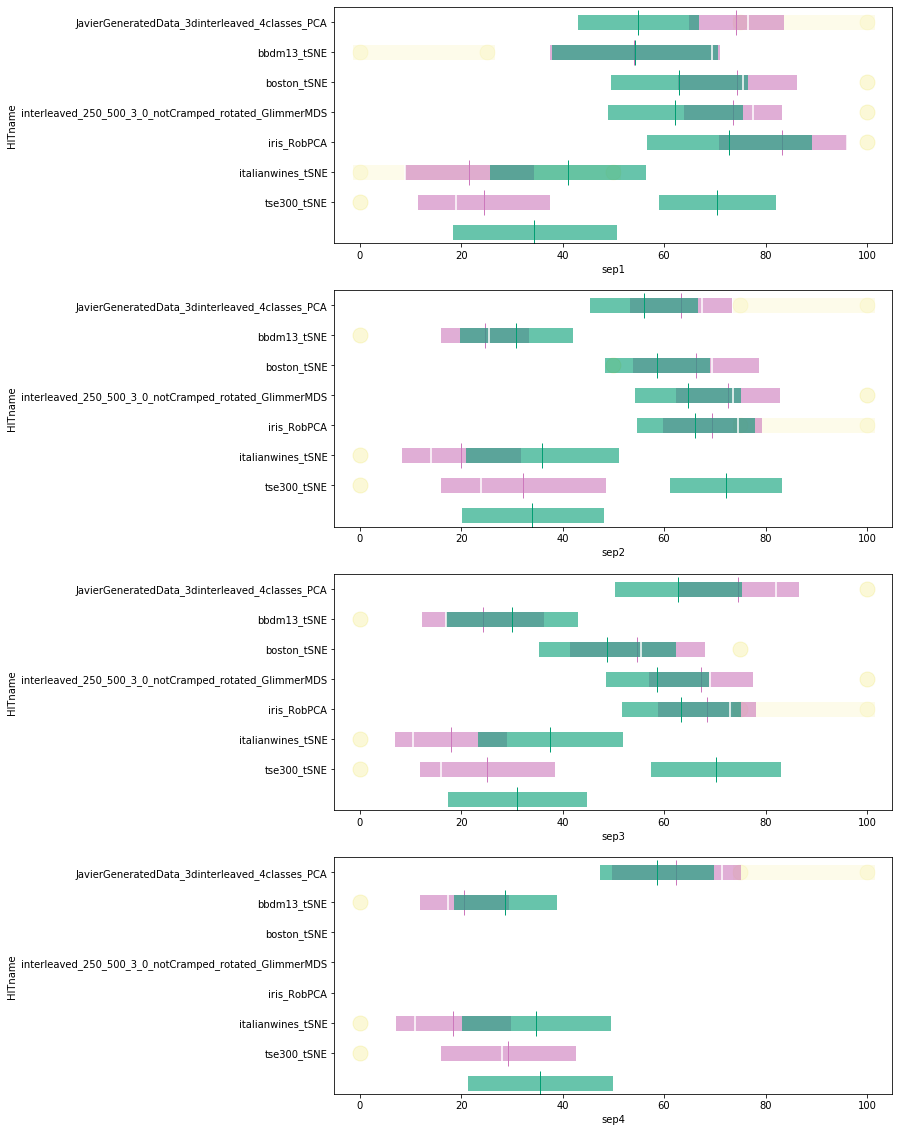

In [62]:
## df training comparison
min_passes = 2

dft_abs = df1.loc[(df1['phase']=='training') & (df1['type'] == 'abstract') & (df1['1v1'] == False)]
dft_sem = df1.loc[(df1['phase']=='training') & (df1['type'] == 'semantic') & (df1['1v1'] == False)]

df_agg_abs = aggregate_batch(dft_abs)
df_agg_sem = aggregate_batch(dft_sem)



fig, axes = get_plots(dft_abs, df_agg_abs, figsize=(10,20), alpha=0, col='white', con_col = pink
                     )

plot_extra(axes, dft_sem, df_agg_sem, green)


fig.savefig(figs + 'abs_sem_preclean.pdf')
#plot_extra(axes, df, df_agg, pink)
df_agg_abs

In [63]:
## df training comparison
min_passes = 3

dft_abs = df.loc[(df1['phase']=='training') & (df['type'] == 'abstract') & (df['passes'] >= min_passes)]
dft_sem = df.loc[(df1['phase']=='training') & (df['type'] == 'semantic') & (df['passes'] >= min_passes)]

df_agg_abs = aggregate_batch(dft_abs)
df_agg_sem = aggregate_batch(dft_sem)



fig, axes = get_plots(dft_abs, df_agg_abs, figsize=(10,20), alpha=0, col='white', con_col = pink)

plot_extra(axes, dft_sem, df_agg_sem, green)


fig.savefig(figs + 'abs_sem_clean.pdf')
#plot_extra(axes, df, df_agg, pink)

KeyError: 'passes'

/Users/morarica/miniconda3/envs/SepMe/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/morarica/miniconda3/envs/SepMe/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/morarica/miniconda3/envs/SepMe/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/morarica/miniconda3/envs/SepMe/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


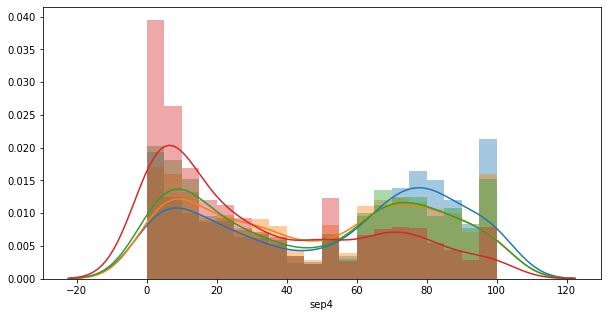

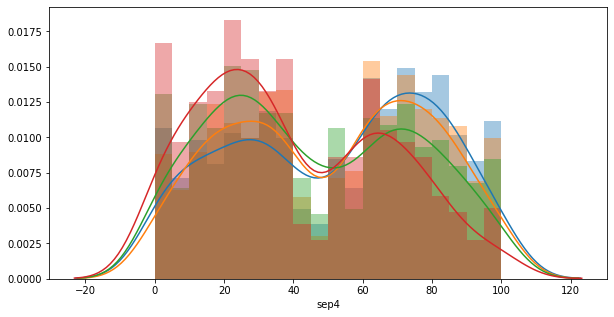

In [39]:
df2 = df.loc[(df['type'] == 'abstract') & (df['passes'] >= min_passes), :].copy()
#df1 = df.loc[(df['training']==1) & (df['type'] == 'abstract') & (df['passes'] >= min_passes)]
df1 = df.loc[(df['type'] == 'semantic') & (df['passes'] >= min_passes)]

dfs = [df2, df1]

for dd in dfs:

    fig, ax = plt.subplots(figsize=(10,5))
    sns.distplot(dd.sep1, bins=20)
    sns.distplot(dd.sep2, bins=20)
    sns.distplot(dd.sep3, bins=20)
    sns.distplot(dd.sep4, bins=20)


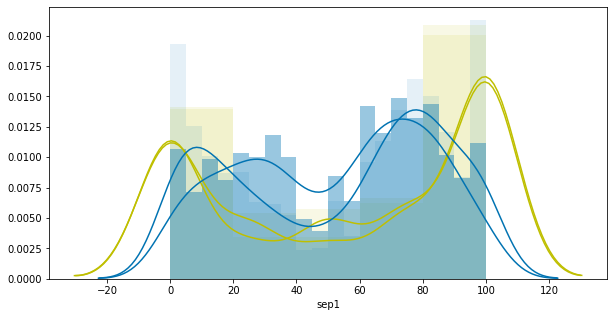

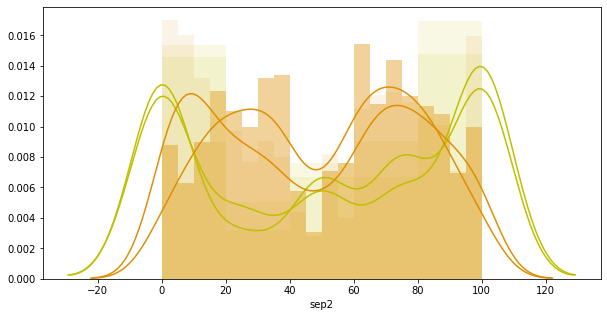

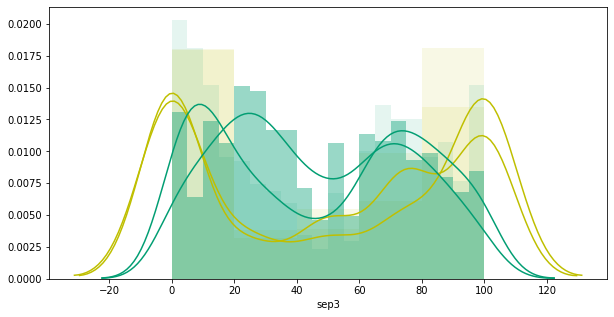

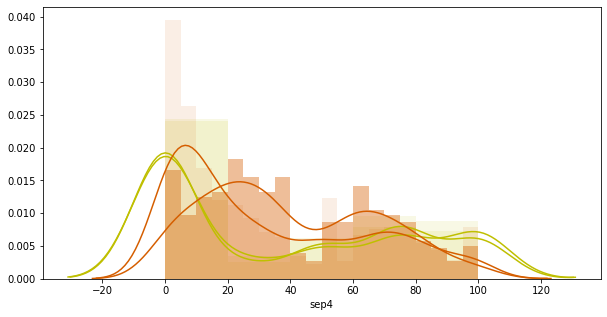

In [40]:
df2 = df.loc[(df['type'] == 'abstract') & (df['passes'] >= min_passes), :].copy()
#df1 = df.loc[(df['training']==1) & (df['type'] == 'abstract') & (df['passes'] >= min_passes)]
df1 = df.loc[(df['type'] == 'semantic') & (df['passes'] >= min_passes)]

for i in range(1,5):
    fig, ax = plt.subplots(figsize=(10,5))
    sns.distplot(df1['mp.{}'.format(i)], bins=5, color="y", hist_kws=dict(alpha=.1))
    sns.distplot(df1['ap.{}'.format(i)], bins=5, color="y", hist_kws=dict(alpha=.1))
    sns.distplot(df1['sep{}'.format(i)], bins=20, color=colors[i-1])
    sns.distplot(df2['sep{}'.format(i)], bins=20, color=colors[i-1], hist_kws=dict(alpha=.1))


## Worker Stats

,WorkerId,type,Approve,1v1,sep1,sep2
169,A2MCG5W6LHSRG9,abstract,X,False,131,131
79,A1TIO97G4K0ZFF,abstract,X,False,129,129
82,A1ULHXPHPJRQVZ,semantic,X,False,127,127
315,A6BD7VGE58KGC,semantic,X,False,126,126
362,AMNRYECHXZY34,semantic,X,False,126,126
371,APYYV3B1MT2B6,semantic,X,False,125,125
10,A139DFNZS0I9RB,semantic,X,False,125,125
337,AF7ZV0U3CGOK0,abstract,X,False,120,120
390,AWJ0LF6A0LXJN,abstract,X,False,116,116
102,A2341KCW7BI2NS,abstract,X,False,113,113


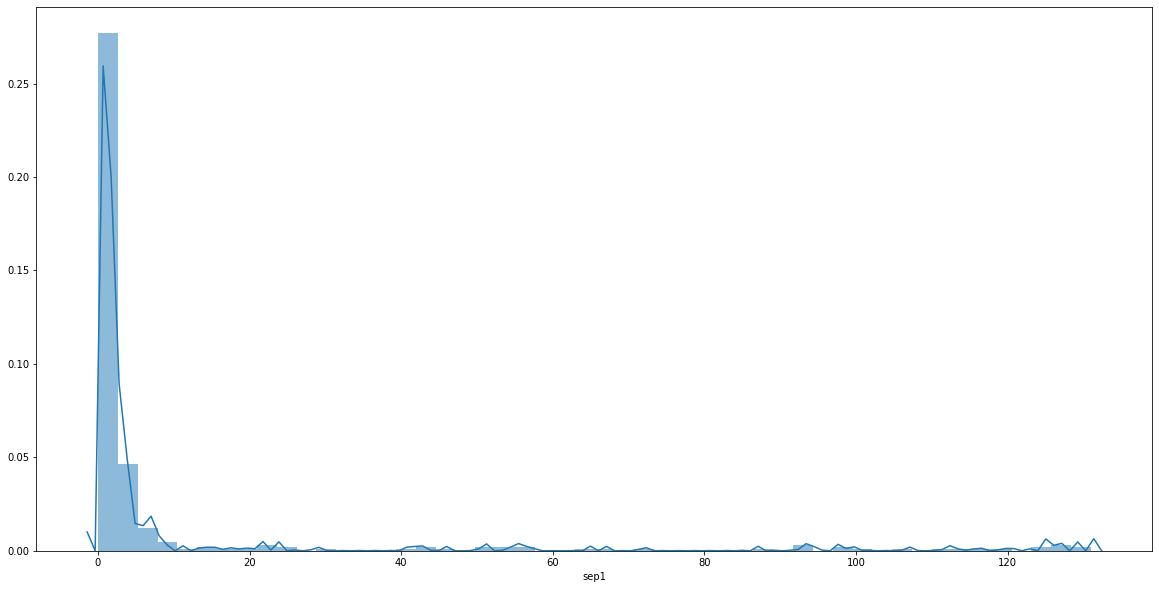

In [43]:
dfw = df.groupby(['WorkerId', 'type', 'Approve', '1v1']) \
        .agg({'sep1':'count', 'sep2':'count'}).reset_index().sort_values(['sep1'], ascending = False)


fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(dfw.loc[: ,'sep1'], hist_kws=dict(alpha=.5))

dfw.head(20)

Stats for workers with HITs between 0 and 135:
Total Workers who took the experiment: 83
-------
Average time spent in this experiment: 46.764328289775335
Median time spent in this experiment: 27.0
-------
Percentage of people between (0,15): 0.19
Percentage of people between (15,30): 0.38
Percentage of people between (30,60): 0.24
Percentage of people between (60,120): 0.14
Percentage of people between (120,180): 0.08
Percentage of people between (180,240): 0.01
Percentage of people between (240,300): 0.01



Stats for workers with HITs between 0 and 135:
Total Workers who took the experiment: 82
-------
Average time spent in this experiment: 44.44675209898365
Median time spent in this experiment: 25.0
-------
Percentage of people between (0,15): 0.23
Percentage of people between (15,30): 0.38
Percentage of people between (30,60): 0.23
Percentage of people between (60,120): 0.13
Percentage of people between (120,180): 0.07
Percentage of people between (180,240): 0.01
Percentage of peo

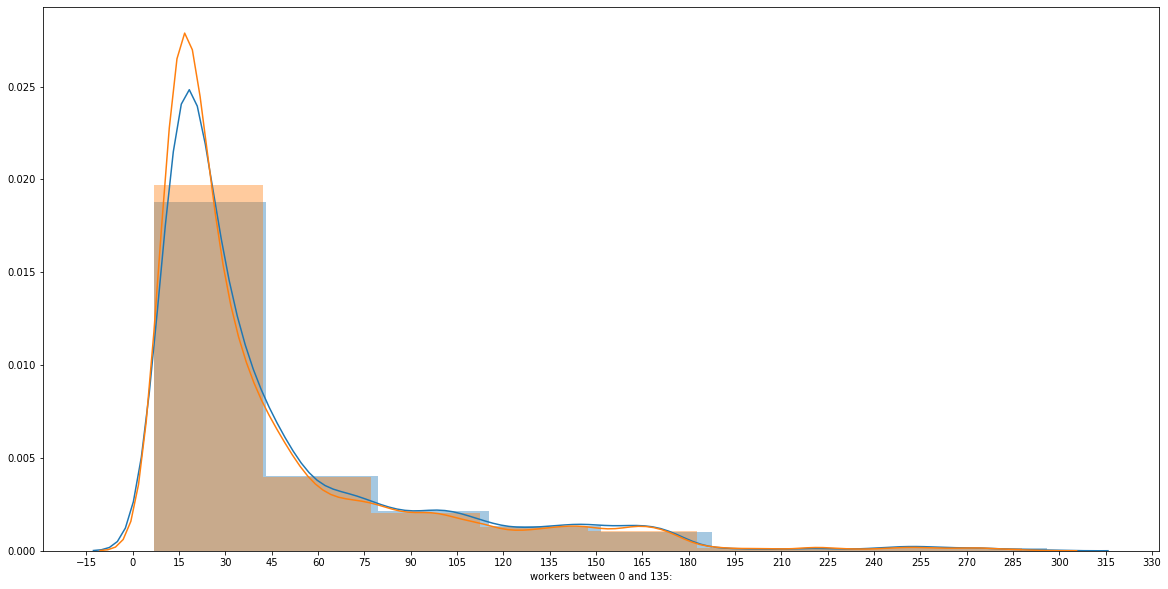

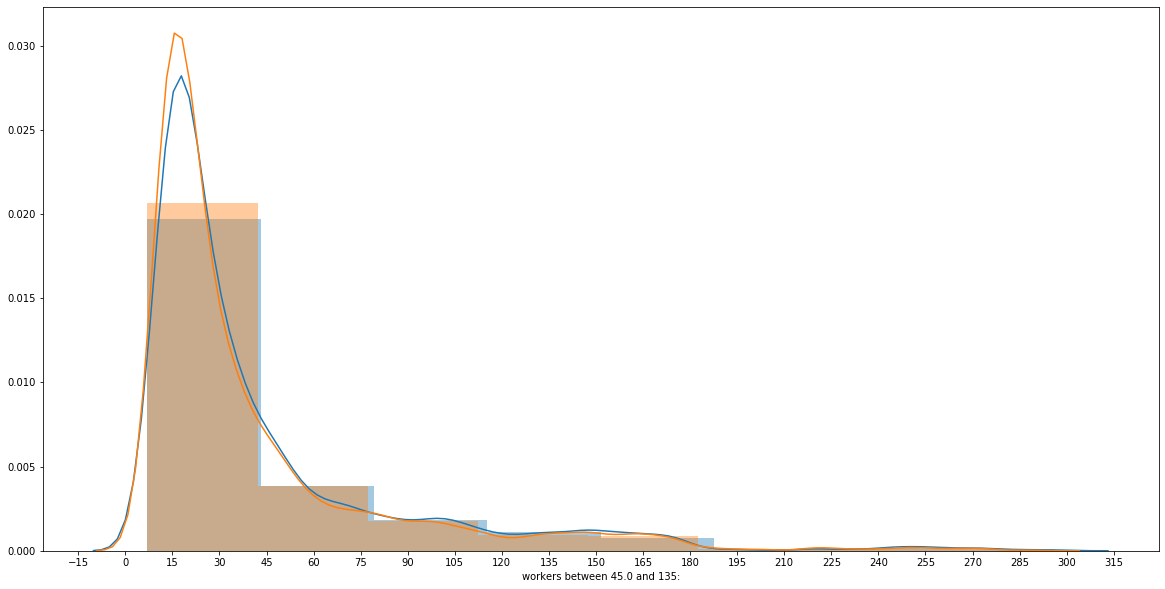

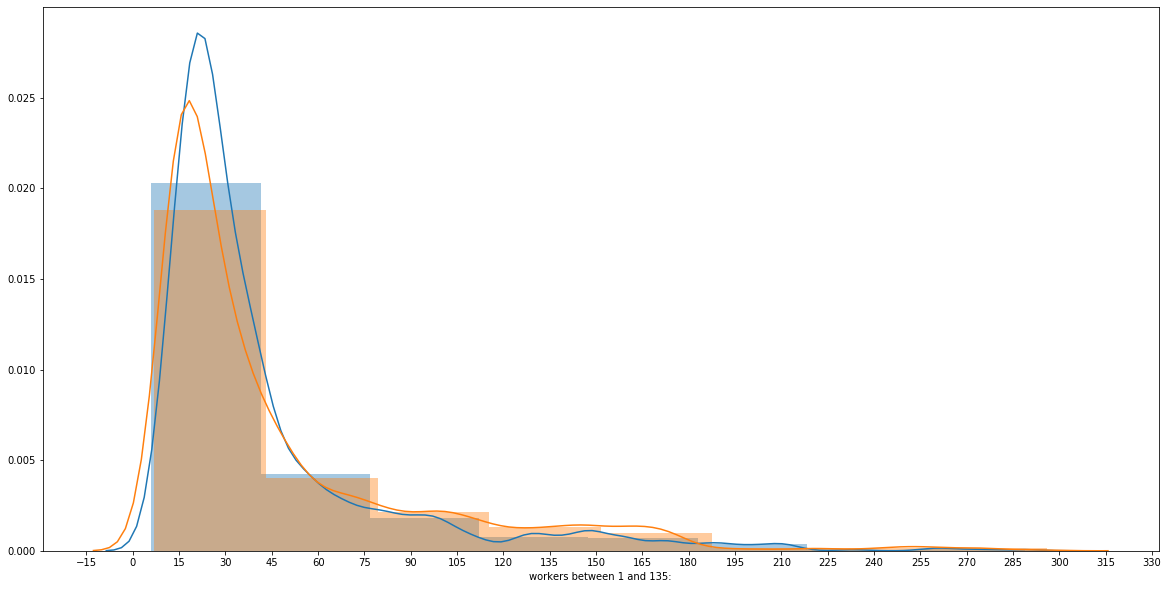

In [160]:
df1 = df.loc[(df['type'] == 'abstract'), :]
df2 = df.loc[(df['type'] == 'semantic'), :]
ss1 = 135



fig, ax = plt.subplots(figsize=(20,10))

get_slice_stats(df1, mmin=0, mmax=ss1, bins=8, ax=ax)
get_slice_stats(df1.loc[df1['passes']>=min_passes], mmin=0, mmax=ss1, bins=8, ax=ax)

fig, ax = plt.subplots(figsize=(20,10))
get_slice_stats(df1, mmin=ss1/3, mmax=ss1, bins=8, ax=ax)
get_slice_stats(df1.loc[df1['passes']>=min_passes], mmin=ss1/3, mmax=ss1, bins=8, ax=ax)
#get_slice_stats(df2, mmin=ss1/3, mmax=ss1, bins=8, ax=ax)


fig, ax = plt.subplots(figsize=(20,10))
get_slice_stats(df2, mmin=1, mmax=ss1, bins=8, ax=ax)
get_slice_stats(df1, mmin=1, mmax=ss1, bins=8, ax=ax)


In [27]:
workers = (
        df.groupby(["WorkerId"])
        .agg({"sep1": "count"})
        .reset_index()
        .sort_values(["sep1"], ascending=False)
    )

workers2 = (
        df2.groupby(["WorkerId"])
        .agg({"sep1": "count"})
        .reset_index()
        .sort_values(["sep1"], ascending=False)
    )

In [34]:
print('Wrokers: {} {}'.format(len(workers.WorkerId), len(workers2.WorkerId)))

print('Wrokers: {} {}'.format(len(workers.loc[workers['sep1']>7].WorkerId), len(workers2[workers2['sep1']>7].WorkerId)))

Wrokers: 48 45
Wrokers: 10 7


In [60]:
df.loc[(df['passes']<=2), 'Reject'] = 'At least half of your answers for this HIT are random.'
df.loc[(df['passes']>2), 'Approve'] = 'X'

df.to_csv('training_approval.csv', index=False)
df.head()

,HITId,HITTypeId,Title,Description,Keywords,Reward,CreationTime,MaxAssignments,RequesterAnnotation,AssignmentDurationInSeconds,...,ppos2,pass2,pneg3,ppos3,pass3,pneg4,ppos4,pass4,passes,Accept
0,3LN50BUKPVGZX35XC1F9BQDKLN1PLW,30YY7N8R2N9X0FWAJMI9N7BA5BY7UA,Judging cluster separability in scatterplots,"Upon success of this HIT, you will receive a Q...","categorize, image, scatterplot, visualization,...",$0.15,Wed Nov 27 07:48:20 PST 2019,20,BatchId:3850931;OriginalHitTemplateId:928390873;,300,...,0.7,1,0.15,0.7,1,0.15,0.7,1,4,X
1,3LN50BUKPVGZX35XC1F9BQDKLN1PLW,30YY7N8R2N9X0FWAJMI9N7BA5BY7UA,Judging cluster separability in scatterplots,"Upon success of this HIT, you will receive a Q...","categorize, image, scatterplot, visualization,...",$0.15,Wed Nov 27 07:48:20 PST 2019,20,BatchId:3850931;OriginalHitTemplateId:928390873;,300,...,0.7,1,0.15,0.7,1,0.15,0.7,1,4,X
2,3LN50BUKPVGZX35XC1F9BQDKLN1PLW,30YY7N8R2N9X0FWAJMI9N7BA5BY7UA,Judging cluster separability in scatterplots,"Upon success of this HIT, you will receive a Q...","categorize, image, scatterplot, visualization,...",$0.15,Wed Nov 27 07:48:20 PST 2019,20,BatchId:3850931;OriginalHitTemplateId:928390873;,300,...,0.7,1,0.15,0.7,1,0.15,0.7,1,4,X
3,3LN50BUKPVGZX35XC1F9BQDKLN1PLW,30YY7N8R2N9X0FWAJMI9N7BA5BY7UA,Judging cluster separability in scatterplots,"Upon success of this HIT, you will receive a Q...","categorize, image, scatterplot, visualization,...",$0.15,Wed Nov 27 07:48:20 PST 2019,20,BatchId:3850931;OriginalHitTemplateId:928390873;,300,...,0.7,0,0.15,0.7,1,0.15,0.7,0,1,NaN
4,3LN50BUKPVGZX35XC1F9BQDKLN1PLW,30YY7N8R2N9X0FWAJMI9N7BA5BY7UA,Judging cluster separability in scatterplots,"Upon success of this HIT, you will receive a Q...","categorize, image, scatterplot, visualization,...",$0.15,Wed Nov 27 07:48:20 PST 2019,20,BatchId:3850931;OriginalHitTemplateId:928390873;,300,...,0.7,1,0.15,0.7,1,0.15,0.7,1,4,X


In [27]:
df.loc[df['1v1']==True, 'WorkerId']

0      4
1      4
2      4
3      4
4      4
      ..
553    4
554    4
555    4
556    4
557    4
Name: passes, Length: 558, dtype: int64

In [45]:

workerId = list(set(df.loc[(df['1v1']==True) & (df['type']=='semantic'), 'WorkerId']))
print(len(workerId))
qualification = pd.DataFrame({"Worker ID": workerId})
qualification["UPDATE-completed_training_b"] = 1
qualification.to_csv('../data/mturk_samples/training_abstract/qualification_semantic_1v1.csv', index=False)

134


In [92]:
df = pd.read_csv('/Users/morarica/Developer/SepMe/data/mturk_samples/training_abstract/training_approval.csv')
df.loc[df['WorkerId'] == 'A6PRQVQM8YZ4W', cols]

,WorkerId,HITname,HITId,WorkTimeInSeconds,Answer.test_mixed_1,Answer.test_mixed_2,Answer.test_mixed_3,sep1,ppos1,pneg1,...,pneg2,pass2,sep3,ppos3,pneg3,pass3,sep4,ppos4,pneg4,pass4
42,A6PRQVQM8YZ4W,boston_tSNE,3ZG552ORAM9611GLO7632M3T1BBV2Y,141,35,15,55,35,0.8,0.15,...,0.15,0,50,0.5,0.35,1,NaN,0.0,0.0,1


In [91]:
cols = []
cols += ['WorkerId', 'HITname', 'HITId','WorkTimeInSeconds', 'Answer.test_mixed_1', 'Answer.test_mixed_2',
       'Answer.test_mixed_3']
for i in range(1,5):
    cols += ['sep{}'.format(i), 'ppos{}'.format(i), 'pneg{}'.format(i), 'pass{}'.format(i)]
    


In [84]:
df.columns

Index(['HITId', 'HITTypeId', 'Title', 'Description', 'Keywords', 'Reward',
       'CreationTime', 'MaxAssignments', 'RequesterAnnotation',
       'AssignmentDurationInSeconds', 'AutoApprovalDelayInSeconds',
       'Expiration', 'NumberOfSimilarHITs', 'LifetimeInSeconds',
       'AssignmentId', 'WorkerId', 'AssignmentStatus', 'AcceptTime',
       'SubmitTime', 'AutoApprovalTime', 'ApprovalTime', 'RejectionTime',
       'RequesterFeedback', 'WorkTimeInSeconds', 'LifetimeApprovalRate',
       'Last30DaysApprovalRate', 'Last7DaysApprovalRate', 'Input.image_url',
       'Input.i', 'Input.class_set', 'sep1', 'sep2', 'sep3', 'sep4',
       'Answer.consent.on', 'Answer.test_mixed_1', 'Answer.test_mixed_2',
       'Answer.test_mixed_3', 'Answer.test_nonsep_1', 'Answer.test_nonsep_2',
       'Answer.test_nonsep_3', 'Answer.test_sep_1', 'Answer.test_sep_2',
       'Answer.test_sep_3', 'Approve', 'Reject', 'HITname', 'image_url', 'i',
       'class_set', 'mp.1', 'ap.1', 'mp.2', 'ap.2', 'mp.3', 'ap

In [94]:
if 4 in [12,2,4]:
    print('r')

r


In [39]:
df1

,1v1,Approve,AssignmentId,Expiration,HITId,HITTypeId,HITname,Input.file_name,Input.i,Input.image_url,...,sep1,sep2,sep3,sep4,sep5,sep6,sep7,sep8,total_recordings,type
0,False,X,333U7HK6IAKN00B1UAH2K1FQKDVJD7,Fri Dec 13 06:49:20 PST 2019,3EKTG13IZU8TC08KKLNHUMJPHDOLML,3B30MLNK63KFT0402M5B969VU62IBZ,JavierGeneratedData_3dinterleaved_4classes_PCA,NaN,4,https://scatterplots.s3.eu-central-1.amazonaws...,...,83.0,71.0,70.0,80.0,NaN,NaN,NaN,NaN,20.0,semantic
1,False,X,34T446B1C1J6T24186CLIQIC04F0CJ,Fri Dec 13 06:49:20 PST 2019,3EKTG13IZU8TC08KKLNHUMJPHDOLML,3B30MLNK63KFT0402M5B969VU62IBZ,JavierGeneratedData_3dinterleaved_4classes_PCA,NaN,4,https://scatterplots.s3.eu-central-1.amazonaws...,...,57.0,58.0,71.0,57.0,NaN,NaN,NaN,NaN,20.0,semantic
2,False,X,37KGEN7NJ4VSB8HPUWDHHRIR7V7PPU,Fri Dec 13 06:49:20 PST 2019,3EKTG13IZU8TC08KKLNHUMJPHDOLML,3B30MLNK63KFT0402M5B969VU62IBZ,JavierGeneratedData_3dinterleaved_4classes_PCA,NaN,4,https://scatterplots.s3.eu-central-1.amazonaws...,...,45.0,44.0,42.0,43.0,NaN,NaN,NaN,NaN,20.0,semantic
3,False,X,37XITHEISXEUTWO02JV02MJZ9UBRC5,Fri Dec 13 06:49:20 PST 2019,3EKTG13IZU8TC08KKLNHUMJPHDOLML,3B30MLNK63KFT0402M5B969VU62IBZ,JavierGeneratedData_3dinterleaved_4classes_PCA,NaN,4,https://scatterplots.s3.eu-central-1.amazonaws...,...,23.0,37.0,100.0,6.0,NaN,NaN,NaN,NaN,20.0,semantic
4,False,X,3AMW0RGHOE7S8N5CEH0PD2DW7G3PNV,Fri Dec 13 06:49:20 PST 2019,3EKTG13IZU8TC08KKLNHUMJPHDOLML,3B30MLNK63KFT0402M5B969VU62IBZ,JavierGeneratedData_3dinterleaved_4classes_PCA,NaN,4,https://scatterplots.s3.eu-central-1.amazonaws...,...,64.0,49.0,33.0,50.0,NaN,NaN,NaN,NaN,20.0,semantic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7285,True,X,345LHZDEDYXYWOKYDKF4EU2PCPU3UZ,Fri Dec 13 04:39:46 PST 2019,3GONHBMNHV3DHPPOZMEQ21UOX6CMZS,3R4WH3MP1KY6XO9CDK26CRXYU87P10,yeast_PCA,NaN,1,https://scatterplots.s3.eu-central-1.amazonaws...,...,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,18.0,abstract
7286,True,X,379J5II41PLYNWD1TQ4Z6YA3QQLEL7,Fri Dec 13 04:39:46 PST 2019,3GONHBMNHV3DHPPOZMEQ21UOX6CMZS,3R4WH3MP1KY6XO9CDK26CRXYU87P10,yeast_PCA,NaN,1,https://scatterplots.s3.eu-central-1.amazonaws...,...,NaN,71.0,NaN,NaN,NaN,NaN,NaN,NaN,18.0,abstract
7287,True,X,3U088ZLJVLYF70A6PXCMUKPFUXQW09,Fri Dec 13 04:39:46 PST 2019,3GONHBMNHV3DHPPOZMEQ21UOX6CMZS,3R4WH3MP1KY6XO9CDK26CRXYU87P10,yeast_PCA,NaN,1,https://scatterplots.s3.eu-central-1.amazonaws...,...,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,18.0,abstract
7288,True,X,3XM0HYN6NL4OEHSZLIX6NFJNVY9EPO,Fri Dec 13 04:39:46 PST 2019,3GONHBMNHV3DHPPOZMEQ21UOX6CMZS,3R4WH3MP1KY6XO9CDK26CRXYU87P10,yeast_PCA,NaN,1,https://scatterplots.s3.eu-central-1.amazonaws...,...,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,18.0,abstract
